<a href="https://colab.research.google.com/github/LuchoValr/Crimen/blob/main/Crimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 43.4 MB/s 
     |████████████████████████████████| 16.7 MB 370 kB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos=pd.read_excel('/content/drive/MyDrive/datos.xlsx')

In [4]:
datos['CODIGO DANE']=datos['CODIGO DANE'].astype(str)
datos['CODIGO DANE']=datos['CODIGO DANE'].str.zfill(5)
datos

,Unnamed: 0,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,Año,Terrorismo,Delitos Sexuales,Homicidios,Amenazas,Extorsion,Secuestro,Poblacion,Total,Indice100k
0,0,ANTIOQUIA,MEDELLÍN (CT),05001,2012,9.0,57.0,1245.0,20.0,209.0,10.0,2240690,1550,69.175120
1,1,ANTIOQUIA,MEDELLÍN (CT),05001,2013,7.0,127.0,914.0,12.0,457.0,7.0,2266969,1524,67.226327
2,2,ANTIOQUIA,MEDELLÍN (CT),05001,2014,NaN,313.0,649.0,2081.0,310.0,7.0,2293601,3360,146.494530
3,3,ANTIOQUIA,MEDELLÍN (CT),05001,2015,1.0,1310.0,489.0,1082.0,243.0,13.0,2320791,3138,135.212520
4,4,ANTIOQUIA,MEDELLÍN (CT),05001,2016,1.0,1341.0,534.0,792.0,336.0,24.0,2351077,3028,128.792039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10790,10790,VICHADA,CUMARIBO,99773,2017,NaN,10.0,11.0,15.0,NaN,NaN,70339,36,51.180711
10791,10791,VICHADA,CUMARIBO,99773,2018,NaN,12.0,7.0,19.0,2.0,NaN,72691,40,55.027445
10792,10792,VICHADA,CUMARIBO,99773,2019,NaN,24.0,4.0,15.0,4.0,NaN,76196,47,61.683028
10793,10793,VICHADA,CUMARIBO,99773,2020,1.0,9.0,7.0,24.0,2.0,NaN,78863,43,54.524936


In [ ]:
url='/content/drive/MyDrive/geodatos/MGN_MPIO_POLITICO.shp'
map=gpd.read_file(url)
map

In [6]:
data=map.merge(datos,left_on='MPIO_CDPMP',right_on='CODIGO DANE')
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10795 entries, 0 to 10794
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   DPTO_CCDGO        10795 non-null  object  
 1   MPIO_CCDGO        10795 non-null  object  
 2   MPIO_CDPMP        10795 non-null  object  
 3   DPTO_CNMBR        10795 non-null  object  
 4   MPIO_CNMBR        10795 non-null  object  
 5   MPIO_CRSLC        10795 non-null  object  
 6   MPIO_NAREA        10795 non-null  float64 
 7   MPIO_CSMBL        10795 non-null  object  
 8   MPIO_VGNC         10795 non-null  int64   
 9   MPIO_TIPO         10795 non-null  object  
 10  Shape_Leng        10795 non-null  float64 
 11  Shape_Area        10795 non-null  float64 
 12  geometry          10795 non-null  geometry
 13  Unnamed: 0        10795 non-null  int64   
 14  DEPARTAMENTO      10795 non-null  object  
 15  MUNICIPIO         10795 non-null  object  
 16  CODIGO DANE   

In [7]:
map=gpd.read_file('/content/drive/MyDrive/geodatos/MGN_MPIO_POLITICO.shp')

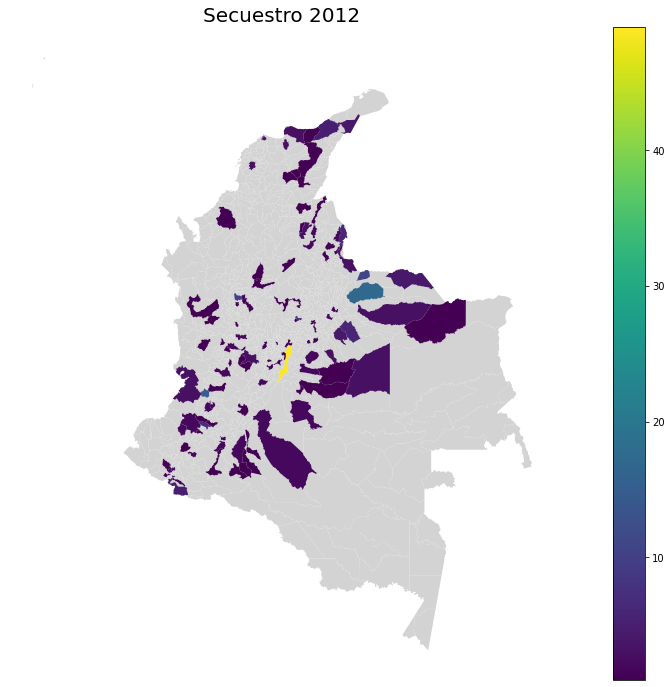

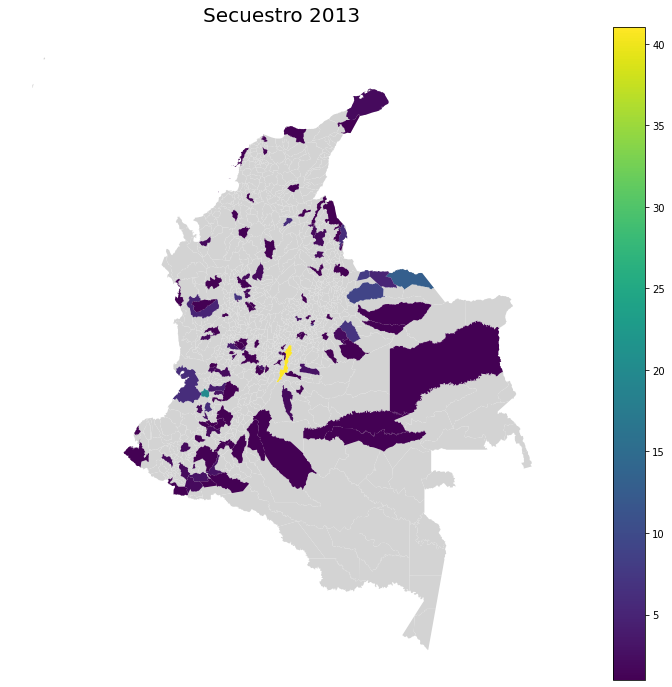

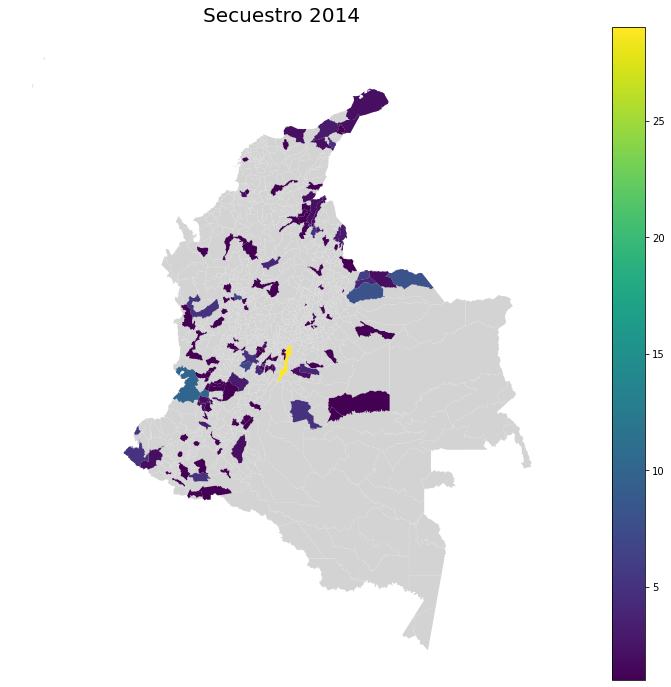

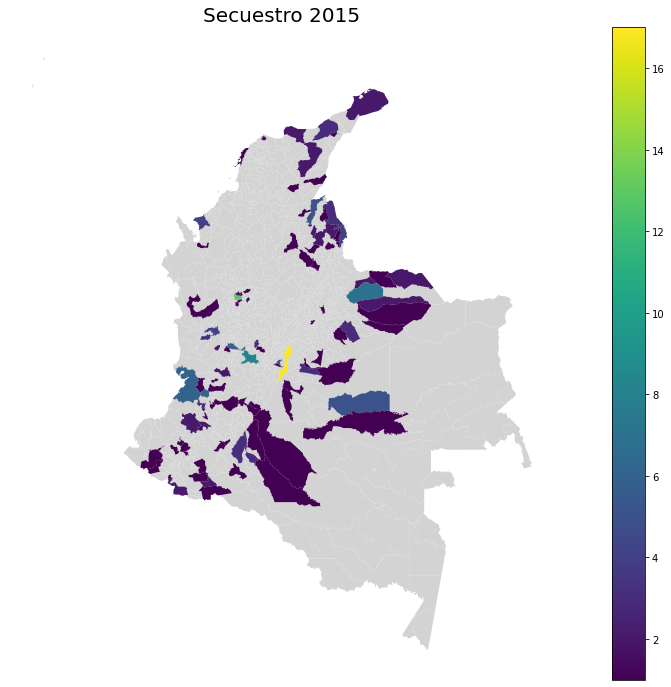

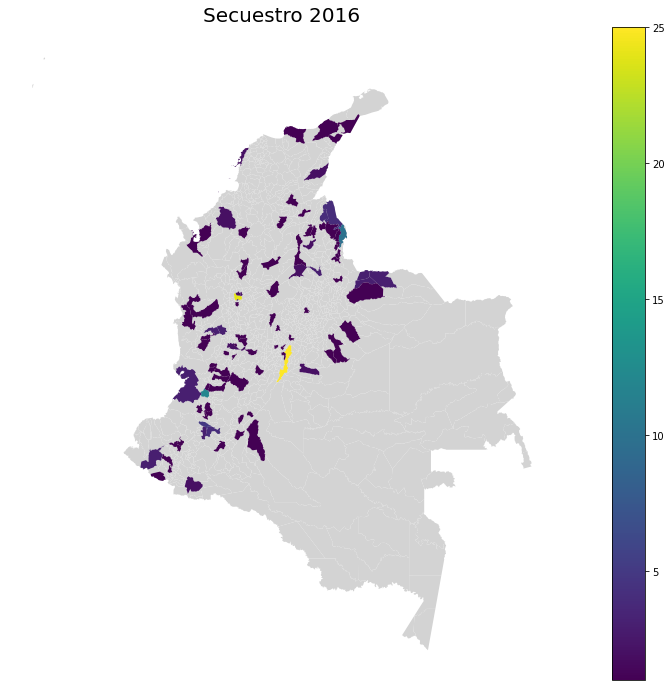

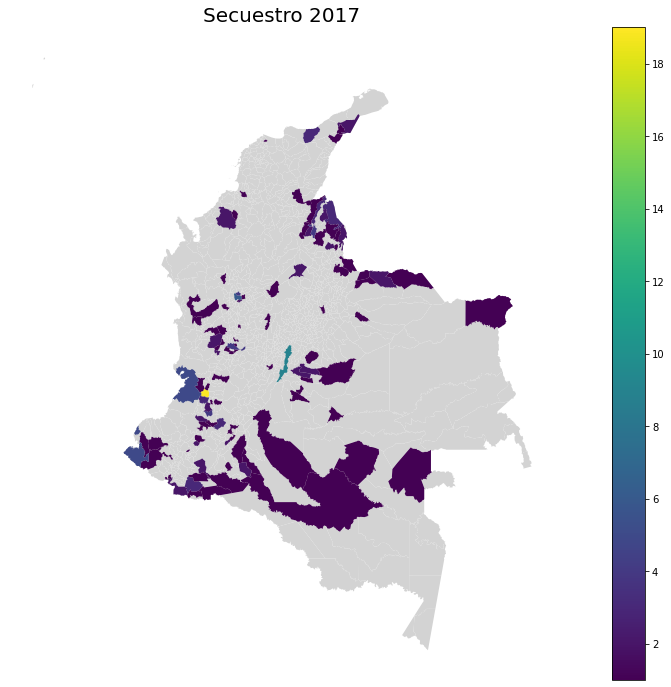

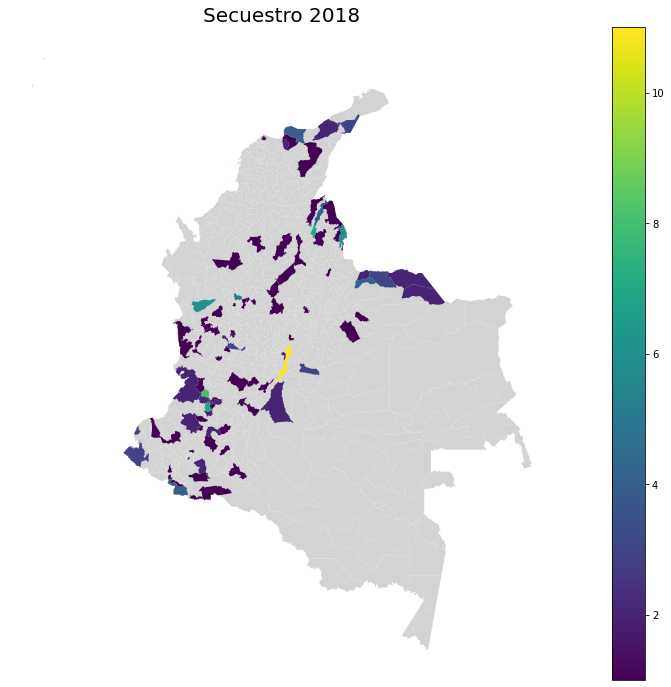

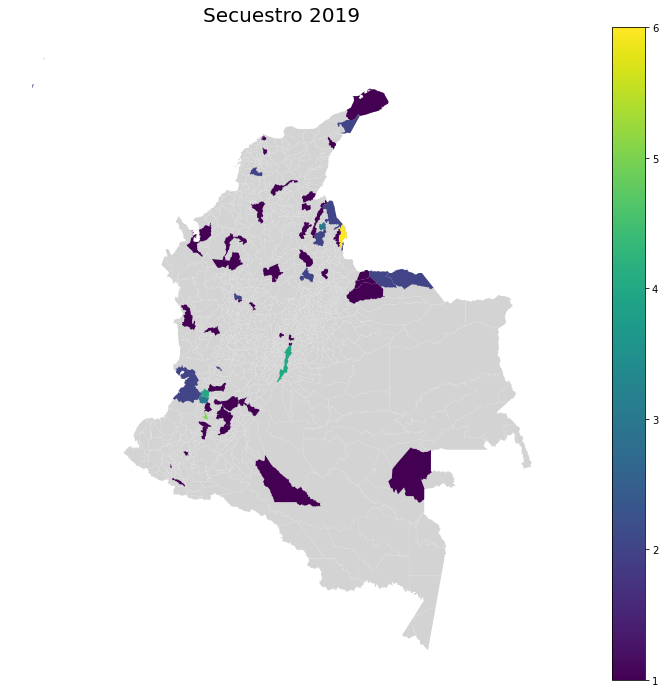

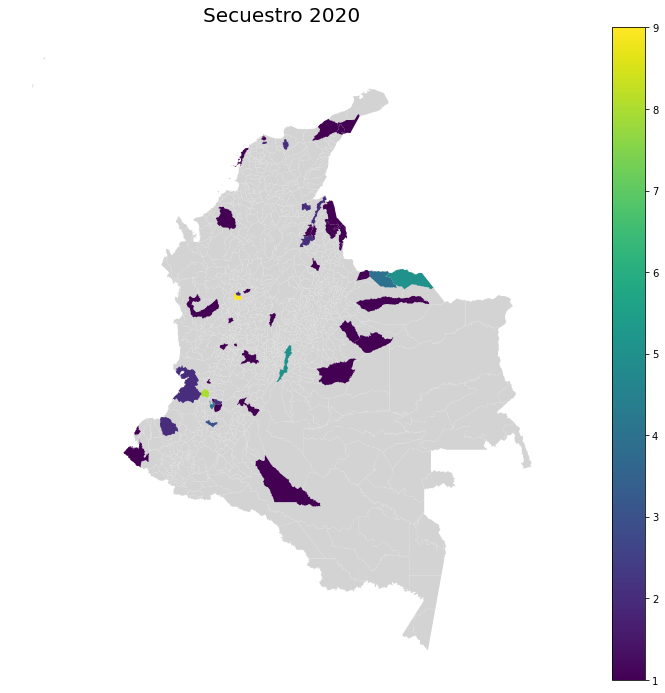

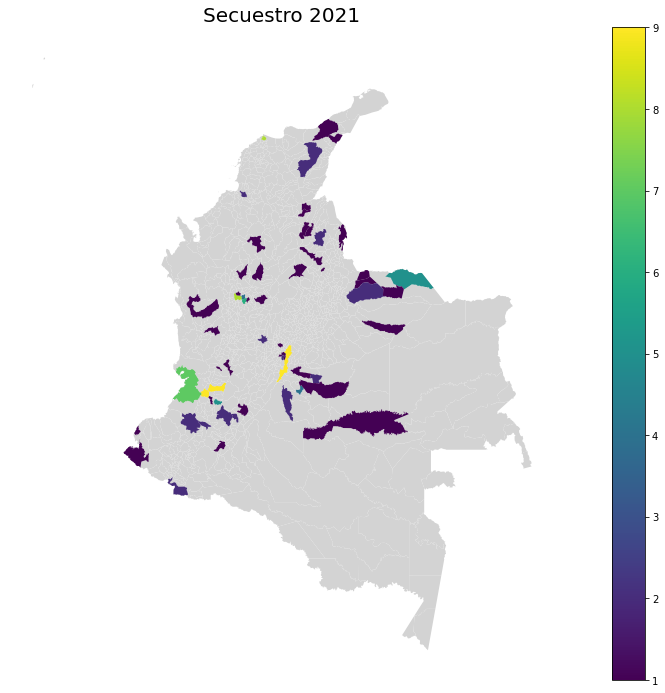

In [11]:
for year in data['Año'].unique():
     df_t = data[data['Año'] == year]
     ax=map.plot(figsize=(20,12),color='lightgray')
     ax.set_axis_off()
     ax.set_title(f'Secuestro {year}',fontsize=20)
     df_t.plot(column='Secuestro',ax=ax,legend=True)
     #plt.savefig(f"Secuestro{year}.png")

In [20]:
for year in data['Año'].unique():
     df_t = data[data['Año'] == year]
     total=df_t['Delitos Sexuales'].sum()
     print(total)

11474.0
11717.0
12777.0
21920.0
23934.0
28349.0
36791.0
38204.0
28626.0
34915.0


###Total e indices

In [ ]:
datos1=datos.groupby(['Año'])['Total'].agg('sum')
datos1=datos1.to_frame()
datos1=datos1.reset_index()
datos1=datos1.set_index('Año')

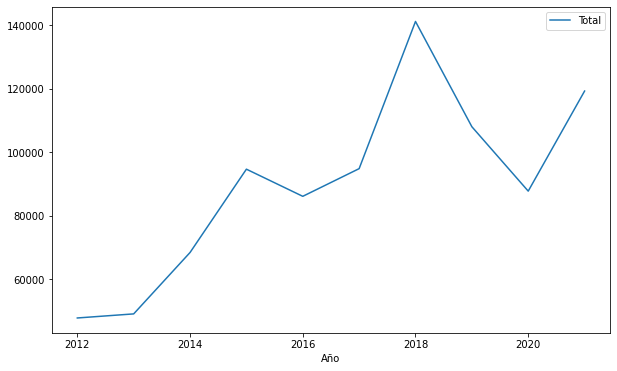

In [ ]:
datos1.plot(figsize=(10,6))
plt.savefig("Total.png")

In [ ]:
datos2=datos.pivot_table(index='Año',columns='MUNICIPIO',values='Indice100k')


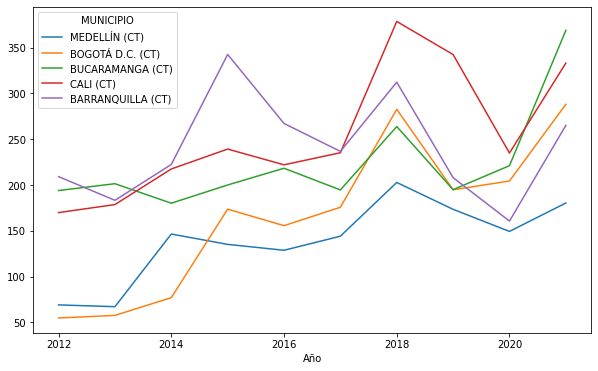

In [ ]:
datos2=datos2[['MEDELLÍN (CT)', 'BOGOTÁ D.C. (CT)','BUCARAMANGA (CT)','CALI (CT)','BARRANQUILLA (CT)']].plot(figsize=(10,6))
plt.savefig("100k.png")

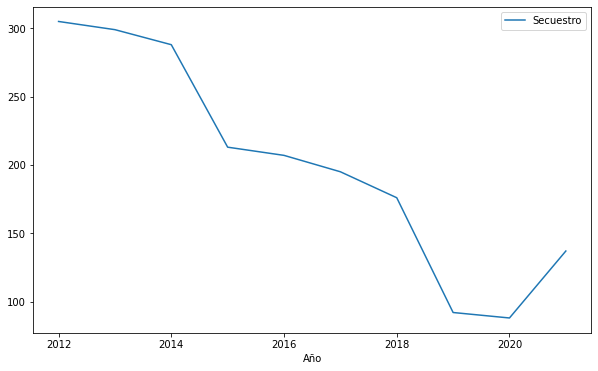

In [ ]:
datos1=datos.groupby(['Año'])['Secuestro'].agg('sum')
datos1=datos1.to_frame()
datos1=datos1.reset_index()
datos1=datos1.set_index('Año')
datos1.plot(figsize=(10,6))
plt.savefig("Secuestrot.png")

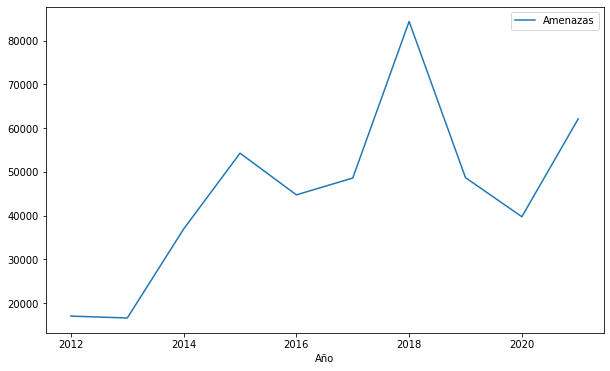

In [ ]:
datos1=datos.groupby(['Año'])['Amenazas'].agg('sum')
datos1=datos1.to_frame()
datos1=datos1.reset_index()
datos1=datos1.set_index('Año')
datos1.plot(figsize=(10,6))
plt.savefig("Amenazast.png")

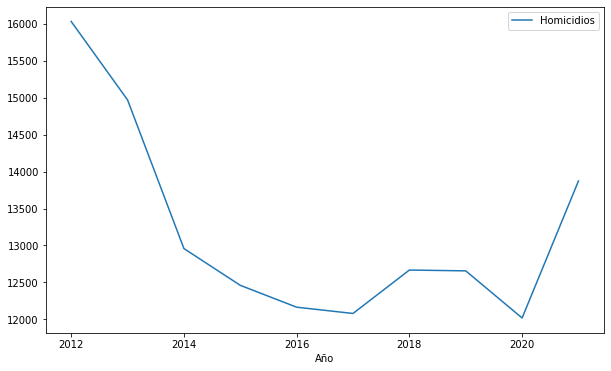

In [ ]:
datos1=datos.groupby(['Año'])['Homicidios'].agg('sum')
datos1=datos1.to_frame()
datos1=datos1.reset_index()
datos1=datos1.set_index('Año')
datos1.plot(figsize=(10,6))
plt.savefig("Homicidiost.png")

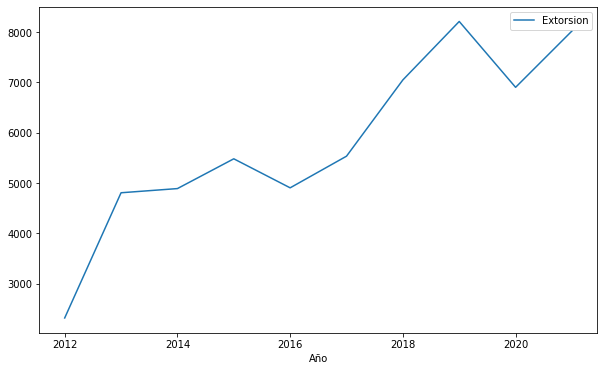

In [ ]:
datos1=datos.groupby(['Año'])['Extorsion'].agg('sum')
datos1=datos1.to_frame()
datos1=datos1.reset_index()
datos1=datos1.set_index('Año')
datos1.plot(figsize=(10,6))
plt.savefig("Extorsiont.png")

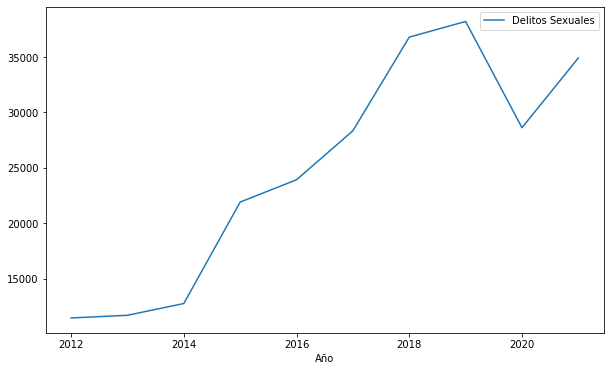

In [ ]:
datos1=datos.groupby(['Año'])['Delitos Sexuales'].agg('sum')
datos1=datos1.to_frame()
datos1=datos1.reset_index()
datos1=datos1.set_index('Año')
datos1.plot(figsize=(10,6))
plt.savefig("delitossexualest.png")

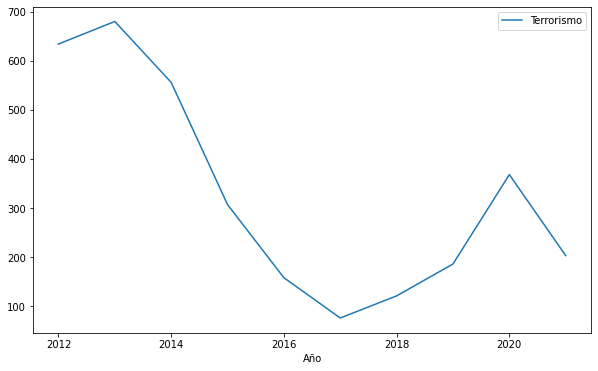

In [ ]:
datos1=datos.groupby(['Año'])['Terrorismo'].agg('sum')
datos1=datos1.to_frame()
datos1=datos1.reset_index()
datos1=datos1.set_index('Año')
datos1.plot(figsize=(10,6))
plt.savefig("terrorismo.png")